In [10]:
import tensorflow as tf
import warnings

import mrcnn
from mrcnn import model as modellib
from mrcnn import config
from mrcnn import visualize

from skimage.io import imread
from skimage.transform import resize

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
def load_image(image_path):
        # Read the image
        img = imread(image_path)
        # Resize the image to a specific size ((512,512) in our case)
        img = resize(img, (512,512), mode='constant', preserve_range=True)

        return img

In [8]:
# Provide a central point to control graph sizes. 
#Change the default size attribute to control the size of plotted images.
def get_ax(rows=1, cols=1, size=8):
    
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [6]:
# Make a TestConfig class that extends our BrainConfig class but used for testing setting IMAGES_PER_GPU= 1
class TestConfig(config.Config):
    NAME= 'Test'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

test_config = TestConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", config=test_config, model_dir=r'd:\\Proj_seg\\logs')

# Get path to saved weights
model_path = r'd:\\Proj_seg\\logs\\trained_mask_rcnn_shapes3.h5'

# Load trained weights and check if the path was empty srtring
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  d:\\Proj_seg\\logs\\trained_mask_rcnn_shapes3.h5


Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  float64
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


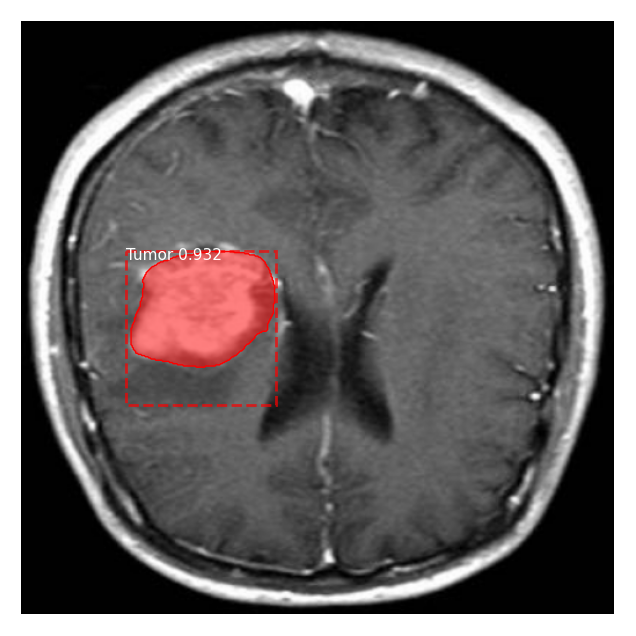

In [15]:
original_image= load_image(r'D:\ITI\Computer vision\Dataset\Brain scans\Tumor\train\TRAIN\y58.jpg')

results = model.detect([original_image], verbose=1)
r = results[0]
masked_image= visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], scores= r['scores'], ax=get_ax())